In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else :
    font_family = 'AppleGothic'

sns.set(font=font_family, rc={"axes.unicode_minus" : False})

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [12]:
# !pip install wordcloud

In [13]:
file = pd.read_csv('../data/갓생_count.csv', index_col=0)
df_word = pd.DataFrame(file)
dic_word=df_word.set_index('word').to_dict()['count']

In [28]:
font = '../font/KoPub Dotum Bold.ttf'

In [29]:
_min = df_word['count'].min()
_max = df_word['count'].max()
df_word

,word,count,min-max,hsl_light
0,존재,7585,0.048860,62.557000
1,퀄리티,3158,0.020339,63.983050
2,소모,1447,0.009316,64.534207
3,의미,15709,0.101199,59.940052
4,동시,6513,0.041954,62.902319
...,...,...,...,...
141828,일조각,1,0.000000,65.000000
141829,박경록,1,0.000000,65.000000
141830,이종서,1,0.000000,65.000000
141831,다이하드,1,0.000000,65.000000


In [30]:
df_word['min-max'] = df_word['count'].apply(lambda x:(x-_min)/(_max-_min))

In [31]:
df_word['hsl_light'] = df_word['min-max'].apply(lambda x: 50*((1-x)+0.3)) # 더해주는 값에 따라 hsl의 l의 범위가 달라짐

In [32]:
df_word

,word,count,min-max,hsl_light
0,존재,7585,0.048860,62.557000
1,퀄리티,3158,0.020339,63.983050
2,소모,1447,0.009316,64.534207
3,의미,15709,0.101199,59.940052
4,동시,6513,0.041954,62.902319
...,...,...,...,...
141828,일조각,1,0.000000,65.000000
141829,박경록,1,0.000000,65.000000
141830,이종서,1,0.000000,65.000000
141831,다이하드,1,0.000000,65.000000


In [33]:
# 스케일링 값으로 크기를 조정하면 너무 차이가 많이나서 count 값으로 설정
dic_word=df_word.set_index('word').to_dict()['count']

In [34]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(13,18),np.random.randint(56,73),np.random.randint(33,65)))

In [35]:
def my_tf_color_func(dic_word):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        _max = max(dic_word.values())
        _min = min(dic_word.values())
        return "hsl({:d}, {:d}%, {:d}%)".format(100, 52, int(50*((1-((dic_word[word]-_min)/(_max-_min)))+0.3)))
        # return "hsl({:d}, {:d}%, {:d}%)".format(100, 52, 50*((1-dic_word[word])+0.5))
    return my_tf_color_func_inner

In [36]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
#                font_path = font_family,      # 폰트 설정
               width = 5000,                 # 가로 크기
               height = 5000,               # 세로 크기
               background_color= "white")   #배경색  
#                colormap="OrRd")  #글자색

In [37]:
%%time
img_wordcloud = wc.generate_from_frequencies(dic_word)

CPU times: user 43.5 s, sys: 2.54 s, total: 46.1 s
Wall time: 46.5 s


CPU times: user 3.39 s, sys: 494 ms, total: 3.88 s
Wall time: 3.03 s


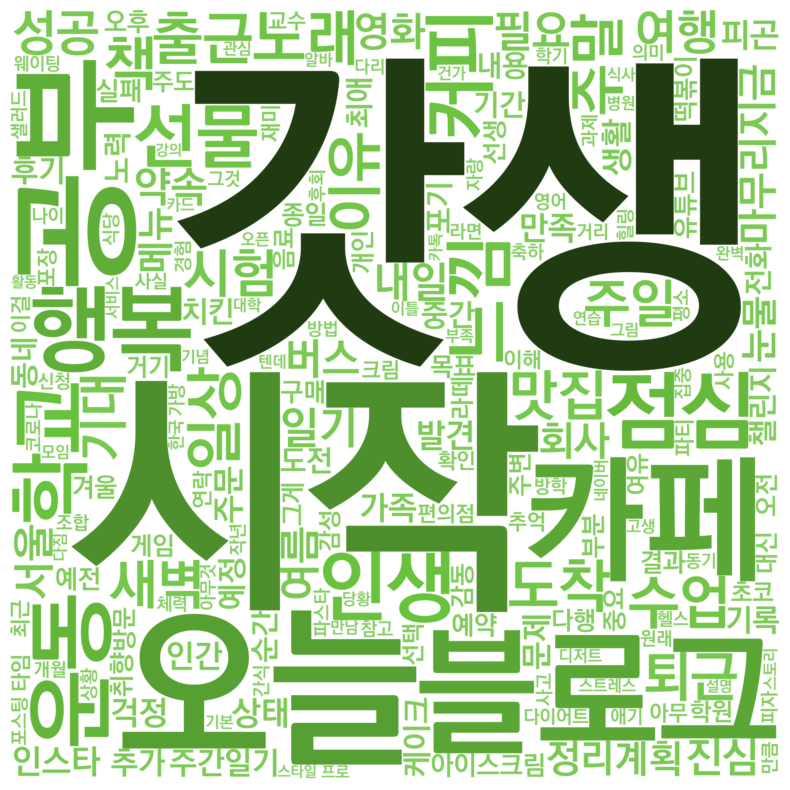

In [38]:
%%time   
# 워드 클라우드 만들기
# img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
# plt.imshow(img_wordcloud)       # 워드 클라우드 출력
plt.imshow(img_wordcloud.recolor(color_func = my_tf_color_func(dic_word)),interpolation="bilinear") 
plt.savefig('../results/갓생_워드클라우드.svg', transparent = True)